## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 Regression 예측 model 작성

auto-mpg.data - data file  
auto-mpg.names - data 설명 file

1. mpg:           continuous  
2. cylinders:     multi-valued discrete  
3. displacement:  continuous (배기량)   
4. horsepower:    continuous  
5. weight:        continuous  
6. acceleration:  continuous  
7. model year:    multi-valued discrete  
8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [2]:
data_path = tf.keras.utils.get_file("auto-mpg.data", 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

data.head()

,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
X_train.shape

(294, 13)

### Regression Model Build

### train

### predict

### $r^2$ 계산

In [5]:
model = Sequential()

model.add(Dense(64, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))

In [6]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [7]:
history = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_test, y_test),
                   verbose=1)

Epoch 1/500
3/3 [==============================] - 1s 68ms/step - loss: 628.4775 - mse: 628.4775 - val_loss: 612.3903 - val_mse: 612.3903
Epoch 2/500
3/3 [==============================] - 0s 14ms/step - loss: 619.5992 - mse: 619.5992 - val_loss: 604.1346 - val_mse: 604.1346
Epoch 3/500
3/3 [==============================] - 0s 14ms/step - loss: 611.5939 - mse: 611.5939 - val_loss: 596.5370 - val_mse: 596.5370
Epoch 4/500
3/3 [==============================] - 0s 13ms/step - loss: 604.0475 - mse: 604.0475 - val_loss: 589.3213 - val_mse: 589.3213
Epoch 5/500
3/3 [==============================] - 0s 14ms/step - loss: 596.8169 - mse: 596.8169 - val_loss: 582.3734 - val_mse: 582.3734
Epoch 6/500
3/3 [==============================] - 0s 14ms/step - loss: 589.9161 - mse: 589.9161 - val_loss: 575.4795 - val_mse: 575.4795
Epoch 7/500
3/3 [==============================] - 0s 14ms/step - loss: 582.9066 - mse: 582.9066 - val_loss: 568.3975 - val_mse: 568.3975
Epoch 8/500
3/3 [=================

3/3 [==============================] - 0s 12ms/step - loss: 7.6901 - mse: 7.6901 - val_loss: 10.5033 - val_mse: 10.5033
Epoch 122/500
3/3 [==============================] - 0s 11ms/step - loss: 7.6391 - mse: 7.6391 - val_loss: 10.5043 - val_mse: 10.5043
Epoch 123/500
3/3 [==============================] - 0s 13ms/step - loss: 7.5953 - mse: 7.5953 - val_loss: 10.5284 - val_mse: 10.5284
Epoch 124/500
3/3 [==============================] - 0s 13ms/step - loss: 7.5569 - mse: 7.5569 - val_loss: 10.5479 - val_mse: 10.5479
Epoch 125/500
3/3 [==============================] - 0s 12ms/step - loss: 7.5267 - mse: 7.5267 - val_loss: 10.5574 - val_mse: 10.5574
Epoch 126/500
3/3 [==============================] - 0s 13ms/step - loss: 7.4838 - mse: 7.4838 - val_loss: 10.5364 - val_mse: 10.5364
Epoch 127/500
3/3 [==============================] - 0s 13ms/step - loss: 7.4442 - mse: 7.4442 - val_loss: 10.5088 - val_mse: 10.5088
Epoch 128/500
3/3 [==============================] - 0s 12ms/step - loss: 7.

3/3 [==============================] - 0s 12ms/step - loss: 5.6863 - mse: 5.6863 - val_loss: 9.5422 - val_mse: 9.5422
Epoch 245/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6781 - mse: 5.6781 - val_loss: 9.5385 - val_mse: 9.5385
Epoch 246/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6780 - mse: 5.6780 - val_loss: 9.5612 - val_mse: 9.5612
Epoch 247/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6800 - mse: 5.6800 - val_loss: 9.5856 - val_mse: 9.5856
Epoch 248/500
3/3 [==============================] - 0s 13ms/step - loss: 5.6756 - mse: 5.6756 - val_loss: 9.5858 - val_mse: 9.5858
Epoch 249/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6713 - mse: 5.6713 - val_loss: 9.5717 - val_mse: 9.5717
Epoch 250/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6628 - mse: 5.6628 - val_loss: 9.5839 - val_mse: 9.5839
Epoch 251/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6609 - mse: 5.

3/3 [==============================] - 0s 13ms/step - loss: 5.1363 - mse: 5.1363 - val_loss: 9.0237 - val_mse: 9.0237
Epoch 369/500
3/3 [==============================] - 0s 13ms/step - loss: 5.1345 - mse: 5.1345 - val_loss: 8.9883 - val_mse: 8.9883
Epoch 370/500
3/3 [==============================] - 0s 12ms/step - loss: 5.1208 - mse: 5.1208 - val_loss: 8.9688 - val_mse: 8.9688
Epoch 371/500
3/3 [==============================] - 0s 12ms/step - loss: 5.1145 - mse: 5.1145 - val_loss: 8.9475 - val_mse: 8.9475
Epoch 372/500
3/3 [==============================] - 0s 11ms/step - loss: 5.1088 - mse: 5.1088 - val_loss: 8.9261 - val_mse: 8.9261
Epoch 373/500
3/3 [==============================] - 0s 13ms/step - loss: 5.1029 - mse: 5.1029 - val_loss: 8.8636 - val_mse: 8.8636
Epoch 374/500
3/3 [==============================] - 0s 12ms/step - loss: 5.0968 - mse: 5.0968 - val_loss: 8.7846 - val_mse: 8.7846
Epoch 375/500
3/3 [==============================] - 0s 12ms/step - loss: 5.1008 - mse: 5.

3/3 [==============================] - 0s 12ms/step - loss: 4.7336 - mse: 4.7336 - val_loss: 8.5025 - val_mse: 8.5025
Epoch 493/500
3/3 [==============================] - 0s 11ms/step - loss: 4.7281 - mse: 4.7281 - val_loss: 8.4925 - val_mse: 8.4925
Epoch 494/500
3/3 [==============================] - 0s 12ms/step - loss: 4.7261 - mse: 4.7261 - val_loss: 8.4994 - val_mse: 8.4994
Epoch 495/500
3/3 [==============================] - 0s 12ms/step - loss: 4.7301 - mse: 4.7301 - val_loss: 8.4998 - val_mse: 8.4998
Epoch 496/500
3/3 [==============================] - 0s 11ms/step - loss: 4.7318 - mse: 4.7318 - val_loss: 8.5059 - val_mse: 8.5059
Epoch 497/500
3/3 [==============================] - 0s 13ms/step - loss: 4.7256 - mse: 4.7256 - val_loss: 8.5082 - val_mse: 8.5082
Epoch 498/500
3/3 [==============================] - 0s 13ms/step - loss: 4.7333 - mse: 4.7333 - val_loss: 8.5515 - val_mse: 8.5515
Epoch 499/500
3/3 [==============================] - 0s 12ms/step - loss: 4.7232 - mse: 4.

In [8]:
model.evaluate(X_test, y_test, verbose=0)

[8.506072044372559, 8.506072044372559]

In [9]:
y_predict = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [10]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.8827531531316476

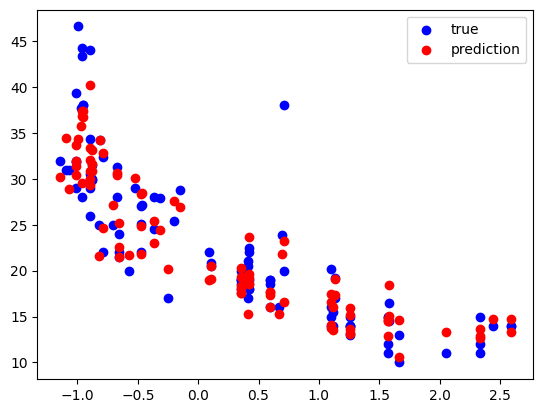

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_test[:, 0], y_test, c='b', label="true")
plt.scatter(X_test[:, 0], y_predict, c='r', label="prediction")
plt.legend()

0.8153451934817522


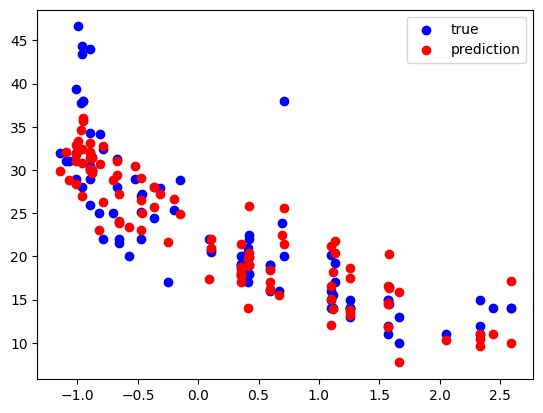

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(r2_score(y_test, y_pred))

plt.scatter(X_test[:, 0], y_test, c='b', label="true")
plt.scatter(X_test[:, 0], y_pred, c='r', label="prediction")
plt.legend()